# **MÓDULO 20 - AULA 4**
# Implementação em Python - Treino

Para demonstrar como aplicamos o algoritmo de Naive Bayes em python, utilizaremos a base que criamos nas aulas de etapas anteriores a modelagem estatística.
Durante as aulas realizamos a limpeza, tratamento, balanceamento, analise, tratamos as variáveis categóricas e criarmos uma base para y teste, x teste e y e x treinamento (já balanceados) usaremos essas bases
 para criarmos nosso modelo.

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff

Começaremos lendo nossas bases:

**Recapitulando:**

As bases de treino são as que usamos para treinar nosso modelo, na primeira etapa da modelagem.

Teste são as bases que usamos para testar o modelo já treinado e ver como ele se ajusta a dados que ele ainda não conhece.

As bases de X sempre terão todas features, todas variáveis do modelo, exceto a target que será a prevista.
As bases y terão apenas a target, que nesse caso é churn.

In [22]:
X_test = pd.read_csv("base_churn/X_test.csv", delimiter=',')
X_train = pd.read_csv("base_churn/X_train_balanced.csv", delimiter=',')
y_test = pd.read_csv("base_churn/y_test.csv", delimiter=',')
y_train = pd.read_csv("base_churn/y_train_balanced.csv", delimiter=',')

Sempre importante verificarmos se dentro das bases de X não temos a variável target (y) a que será prevista.
E se todas nossas variáveis estão já transformadas.

Outro fator importante é garantir que X test e y test tem o mesmo número de linhas, assim como y e x train.

In [23]:
X_test

,Credit_Score,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Genero_encoded,Pais_encoded
0,686,36.0,3,95848.58,2,0.0,1.0,7144694.0,1,0
1,703,35.0,1,0.00,1,1.0,1.0,14136462.0,1,0
2,730,26.0,6,0.00,1,1.0,1.0,1011687.0,1,2
3,675,33.0,6,0.00,2,0.0,1.0,1011687.0,0,0
4,754,24.0,3,121513.31,2,0.0,1.0,1011687.0,0,1
...,...,...,...,...,...,...,...,...,...,...
24922,786,37.0,4,0.00,2,0.0,1.0,1011687.0,0,2
24923,592,35.0,7,122724.50,1,1.0,1.0,17773874.0,1,0
24924,645,45.0,7,121286.32,1,1.0,1.0,869372.0,1,0
24925,567,47.0,1,126447.40,1,1.0,0.0,1011687.0,0,1


In [24]:
y_test

,Churn
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
24922,0.0
24923,0.0
24924,0.0
24925,1.0


In [25]:
y_train

,Churn
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
117945,1.0
117946,1.0
117947,1.0
117948,1.0


In [26]:
X_train

,Credit_Score,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Genero_encoded,Pais_encoded
0,711,35.000000,10,0.000000,2,1.000000,0.000000,5331178.0,1,0
1,619,33.000000,7,0.000000,2,0.000000,1.000000,1011687.0,1,0
2,841,54.000000,4,102721.490000,1,1.000000,1.000000,1011687.0,1,1
3,679,48.000000,6,125161.240000,1,1.000000,0.000000,579659.0,1,0
4,656,42.000000,6,0.000000,3,0.000000,0.000000,14233155.0,0,0
...,...,...,...,...,...,...,...,...,...,...
117945,529,43.000000,7,0.000000,1,0.514157,0.000000,1011687.0,1,2
117946,639,44.450575,7,0.000000,1,1.000000,0.725287,1011687.0,0,2
117947,541,49.890057,6,102744.063633,1,1.000000,0.000000,1011687.0,0,1
117948,593,37.911470,5,139949.785268,1,1.000000,0.000000,1011687.0,0,1


**Classificação:** Se estiver lidando com um problema de classificação, a coluna alvo (y) deve conter os rótulos de classe para cada exemplo de treinamento. Por exemplo, se estiver classificando e-mails como spam ou não spam, a coluna alvo seria uma lista de rótulos, onde cada rótulo indica se o e-mail correspondente é spam ou não.

**Regressão:** Se estiver trabalhando em um problema de regressão, a coluna alvo (y) deve conter os valores numéricos que o modelo tentará prever. Por exemplo, se estiver prevendo o preço de uma casa com base em suas características, a coluna alvo seria uma lista de preços, onde cada preço corresponde a uma casa no conjunto de dados de treinamento.

O número de linhas está correto e as colunas também!

Vamos verificar o balanceamento:

In [27]:
# Contar o número de exemplos de cada classe em y_train
train_balance = y_train.value_counts()
print("Balanceamento em y_train:")
print(train_balance)

# Contar o número de exemplos de cada classe em y_test
test_balance = y_test.value_counts()
print("\nBalanceamento em y_test:")
print(test_balance)

Balanceamento em y_train:
Churn
0.0      58975
1.0      58975
Name: count, dtype: int64

Balanceamento em y_test:
Churn
0.0      19649
1.0       5278
Name: count, dtype: int64


**Vamos agora importar a biblioteca necessária:**

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

Isso permitirá que você crie uma instância do classificador Naive Bayes Gaussiano e o utilize para realizar tarefas de classificação com base na distribuição gaussiana dos dados.

In [29]:
# Criação de uma instância do classificador Naive Bayes Gaussiano
naive_churn = GaussianNB()
# Treinamento do classificador usando os dados de treinamento
naive_churn.fit(X_train, y_train)

c:\Users\emers\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GaussianNB()

Então nessa etapa estamos treinando nosso modelo com os dados de treinamento, nosso código está montando a lógica daquela tabela que realizamos manualmente durante a aula porém com os dados de treinamento.

Vamos avaliar como nosso modelo se saiu com o teste:

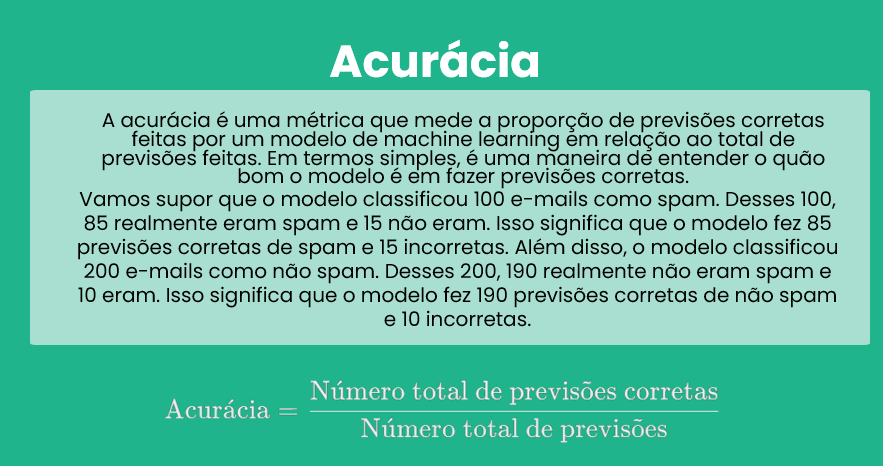

In [30]:
# Fazer previsões para os dados de treino
y_pred_train = naive_churn.predict(X_train)
# Calcular a acurácia
accuracy = accuracy_score(y_train, y_pred_train)
print("Acurácia:", accuracy)

Acurácia: 0.5854938533276812


Uma acurácia de 0.58 indica que o modelo está fazendo previsões corretas em cerca de 58% dos exemplos no conjunto de dados de treinamento.

A acurácia é uma métrica útil para entender a taxa geral de previsões corretas do modelo, mas lembre-se de que pode não ser suficiente para avaliar completamente o desempenho do modelo. Dependendo do contexto do problema, você também pode querer considerar outras métricas de avaliação, como precisão, revocação, F1-score, entre outras.

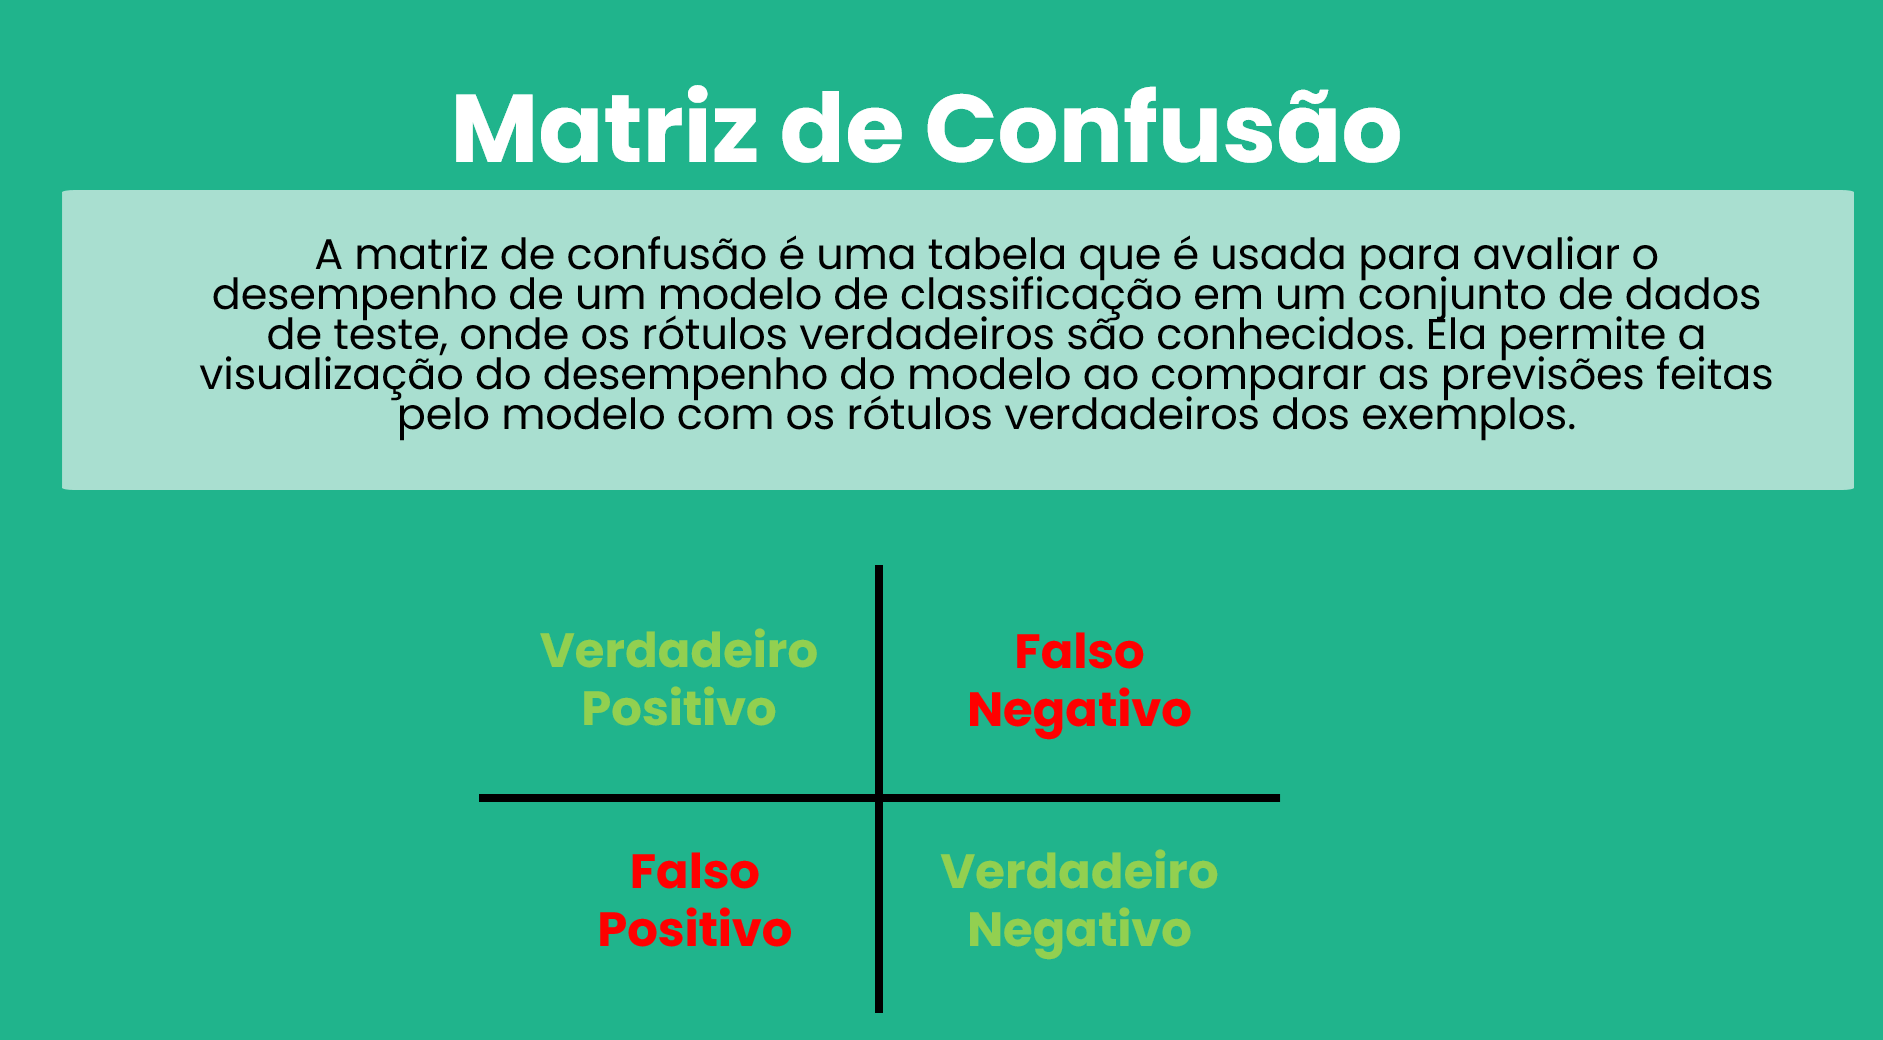

In [31]:
conf_matrix = confusion_matrix(y_train, y_pred_train)

# Definindo  nomes de classes
class_names = ['Churn', 'Não Churn']

# Plotando a matriz de confusão com Plotly
fig = ff.create_annotated_heatmap(
    z=conf_matrix,
    x=class_names,
    y=class_names,
    colorscale='Blues',
    showscale=True
)
fig.update_layout(
    title='Matriz de Confusão',
    xaxis_title='Predicted labels',
    yaxis_title='True labels',
    font=dict(
        family='Arial',
        size=12,
        color='black'
    )
)

In [32]:
conf_matrix = confusion_matrix(y_train, y_pred_train)

conf_matrix

array([[31637, 27338],
       [21553, 37422]], dtype=int64)

In [33]:
69059/117950

0.5854938533276812

O bacana da matriz é que de quebra ela já nos ajuda a identificar os falsos negativos e positivos, assim conseguimos identificar se nosso modelo está errando para qual dos lados. Nesse caso vemos que ele tem tido dificuldade para classificar aqueles que são Churn.

Ou seja nosso modelo acertou na base de treino 31.6K das ocorrencias de não churn e 37.4k das ocorrencias de churn, até que temos um equilibrio, entretanto ele ainda tem errado bastante ocorrências.

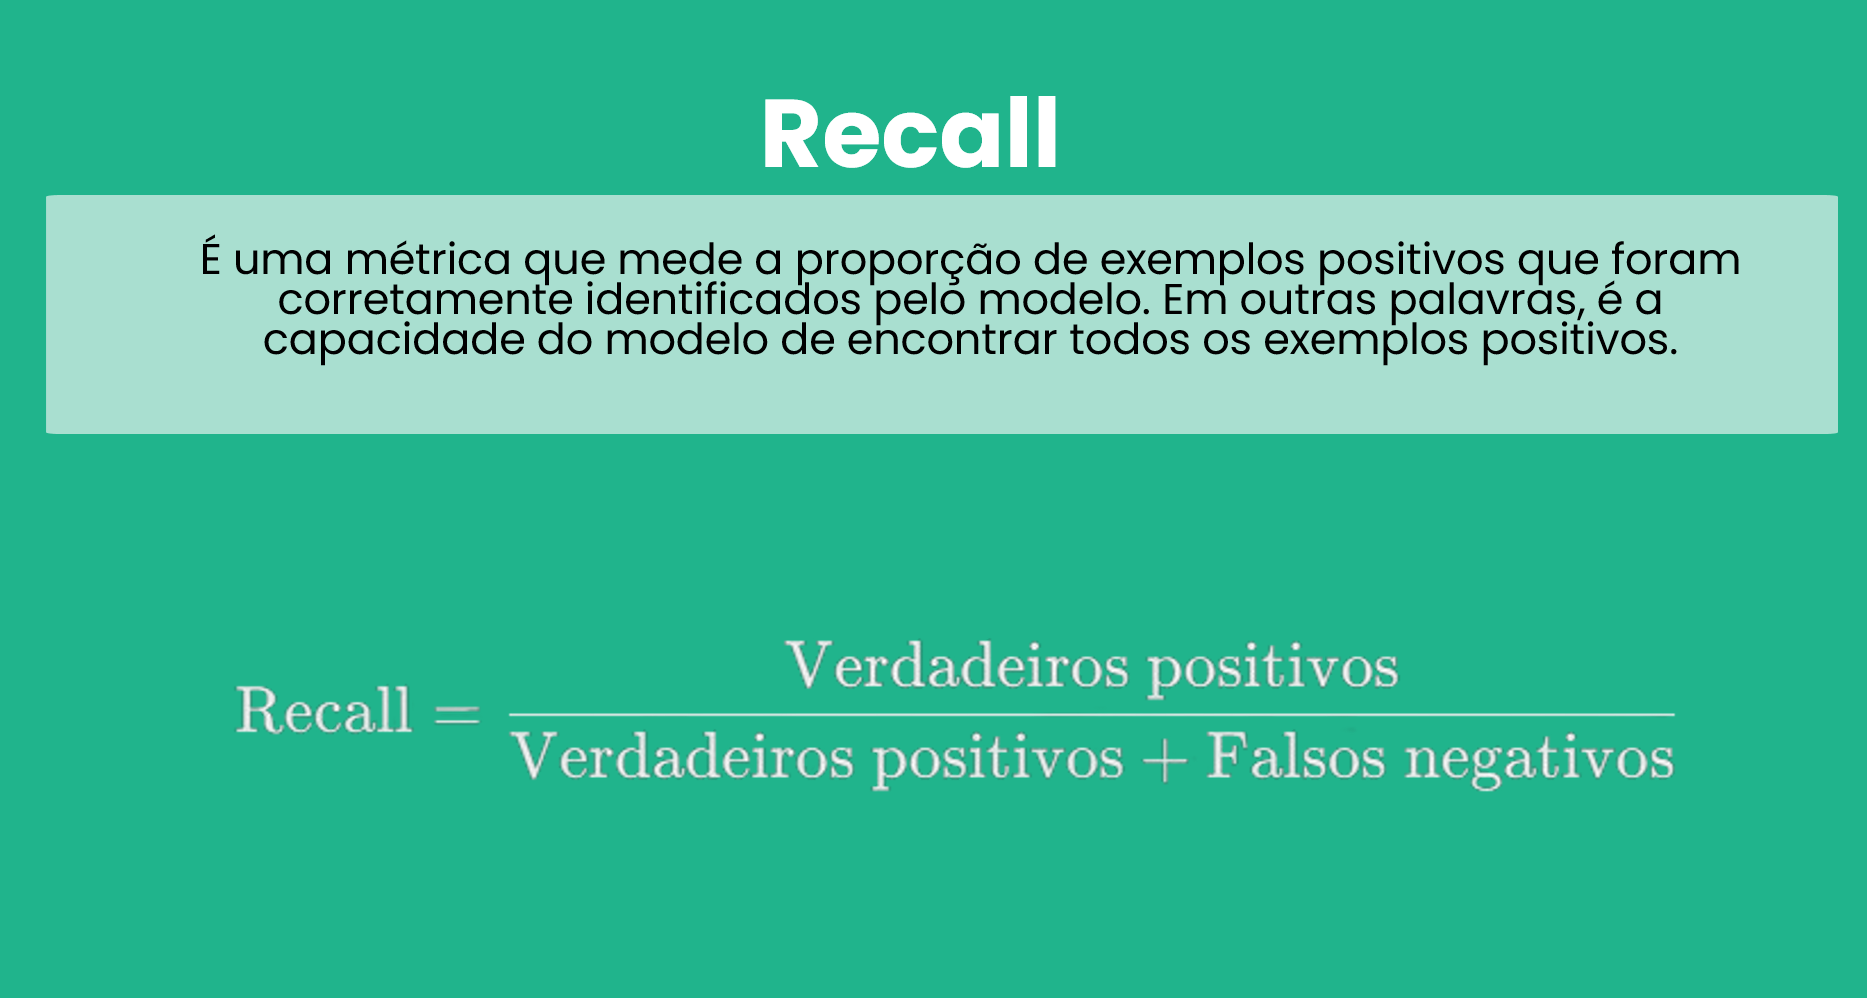

In [34]:
recall = recall_score(y_train, y_pred_train)
print("Recall:", recall)

Recall: 0.634540059347181


Um recall de 0.63 indica que o modelo está corretamente identificando cerca de 63% dos exemplos positivos (Churn) no conjunto de dados. Em outras palavras, dos clientes que realmente deixaram a empresa (Churn), o modelo conseguiu identificar corretamente 63% deles.

# **MÓDULO 20 - AULA 5**
# Implementação em Python - Teste

Agora iremos fazer previsões com o modelo treinado: Use o modelo treinado para fazer previsões nos dados de teste. Para isso, utilize o método predict do modelo.

In [35]:
y_pred_test = naive_churn.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)


print("Acurácia:", accuracy)
print("Recall:", recall)

Acurácia: 0.555261363180487
Recall: 0.6479727169382342


In [37]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

conf_matrix

array([[10421,  9228],
       [ 1858,  3420]], dtype=int64)

* O modelo tem um recall (sensibilidade) semelhante nos conjuntos de treinamento e teste, o que indica que ele está identificando corretamente uma proporção semelhante de exemplos positivos (Churn) em ambos os conjuntos de dados.
* A acurácia do modelo é até que considerada baixa, o que sugere que ele pode estar tendo dificuldades em classificar corretamente alguns exemplos em ambas as classes.

In [38]:
# Visualizar os valores previstos
print("Valores Previstos:")
print(y_pred_test)

Valores Previstos:
[1. 0. 0. ... 1. 1. 0.]


In [39]:
# Visualizar os valores reais
print("\nValores Reais:")
print(y_test)


Valores Reais:
       Churn
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
...      ...
24922    0.0
24923    0.0
24924    0.0
24925    1.0
24926    0.0

[24927 rows x 1 columns]


No cenário de outros tipos de modelos poderiamos e iremos mais a frente aplicar técnicas para tentar melhorar o desempenho do modelo, por exemplo entendendo quais são as features mais "valiosas" para previsão.
 Como o Naive Bayes assume independência condicional entre as características, ele não fornece diretamente coeficientes ou importâncias de características como em modelos lineares ou baseados em árvores.